<a href="https://colab.research.google.com/github/SmartPracticeschool/llSPS-INT-3742-Chronic-kidney-disease-analysis/blob/master/CKD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Predicting Chronic Kidney Disease or not

In [ ]:
#import libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k
import keras.initializers

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('kd.csv')
#print the first 5 rows
df.head()

Saving kd.csv to kd.csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
#get the shape of the data(the number of rows &cols)
df.shape

(400, 26)

In [ ]:
#create a list of column names to keep
columns_to_retain = ['sg','al','sc','hemo','pcv','dm','htn','classification']

#Drop the columns that are not in columns_to_retain
df = df.drop(  [col for col in df.columns if not col in columns_to_retain] , axis=1  )

#Drop the rows with na or missing values
df = df.dropna(axis=0)

In [ ]:
#Transform the non-numeric data in the columns
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform( df[column] )

In [ ]:
#Print the First 5 rows of the new cleaned data set
df.head()

,sg,al,sc,hemo,pcv,htn,dm,classification
0,1.020,1.0,1.2,15.4,28,1,2,0
1,1.020,4.0,0.8,11.3,22,0,1,0
2,1.010,2.0,1.8,9.6,15,0,2,0
3,1.005,4.0,3.8,11.2,16,1,1,0
4,1.010,2.0,1.4,11.6,19,0,1,0


In [ ]:
#split the data into independent (x) data set and dependent (y) data set (the target)
X = df.drop(['classification'], axis=1)
y = df['classification']

In [ ]:
#Feature Scaling
#min-max scaler method scales the data set so that all the input features lie between 0 and 1
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)


In [ ]:
#split the data into 80% training and 20% testing & shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [ ]:
#Build the model
model = Sequential()
model.add( Dense(256, input_dim = len(X.columns) , kernel_initializer = k.initializers.random_normal(seed=13), activation='relu'))
model.add( Dense(1, activation= 'hard_sigmoid'))

In [ ]:
#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Train the model
history = model.fit(X_train, y_train, epochs = 2000, batch_size= X_train.shape[0])

Epoch 1/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5415
Epoch 2/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5415
Epoch 3/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.5415
Epoch 4/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.8253
Epoch 5/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6605 - accuracy: 0.9869
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.9913
Epoch 7/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6447 - accuracy: 0.9825
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6369 - accuracy: 0.9782
Epoch 9/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6291 - accuracy: 0.9782
Epoch 10/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.9738
Epoch 11/2000
1/1 [

In [ ]:
#save the model
model.save('ckd.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ckd.model/assets


Text(0.5, 0, 'epoch')

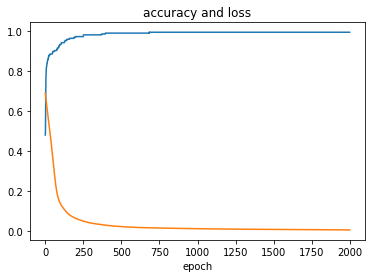

In [ ]:
#visualize the model loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.title('accuracy and loss')
plt.xlabel('epoch')

In [ ]:
print('shape of the training data:', X_train.shape)
print('shape of test data:', X_test.shape)

shape of the training data: (229, 6)
shape of test data: (58, 6)


In [ ]:
#shown the actual and predicted values
pred = model.predict(X_test)  
pred =  [1 if y>=0.5 else 0 for y in pred]
pred

print('Original  : {0}' .format(", ".join(str(x) for x in y_test)))
print('Predicted : {0}' .format(", ".join(str(x) for x in pred)))

Original  : 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1
Predicted : 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1
